<a href="https://colab.research.google.com/github/MadriD2ev/hacking-civico/blob/master/proyecto/proyecto_hacking_civico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


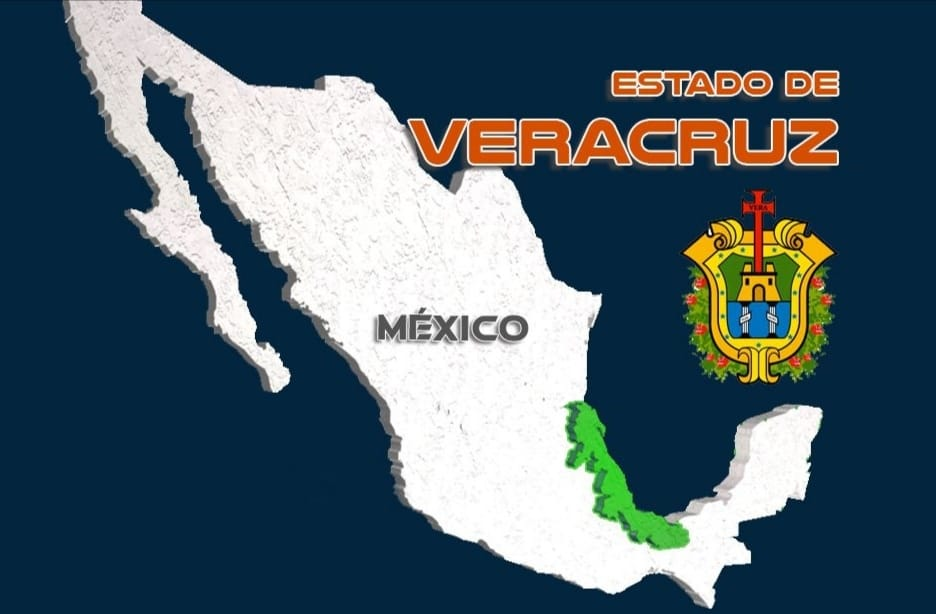

# **Ciclones que han impactado y municipios que han sido afectado por ellos en el Estado de Veracruz de 1999 a 2014.**



####El siguiente análisis tiene como finalidad observar las zonas afectadas por inundaciones derivadas de los ciclones que han azotado al Estado de Veracruz. Se esperaría que en un futuro pudiera tomarse como referencia para organizar a la población en la evacuación oportuna de dichos lugares. 

####La información se ha obtenido del portal del Gobierno de México en su apartado de datos abiertos del Estado de Veracruz y se realizaron consultas a otros sitios informativos para enriquecerla porque solo se describían los fenómenos naturales que impactaron al Estado ya sean huracanes, depresiones tropicales o tormentas y el número de eventos meteorológicos que cada uno de ellos generó (viento, precipitaciones, entro otros) pero no los municipios que afectaron directamente, debido a esta situción se agrega una columna en el archivo original con el nombre de los municipios afectados.

####Para efecto de este análisis se trataran como ciclones conforme a lo establecido en las fuentes de información, previamente se debe considerar la homologación de los datos y excepciones de reglas ortográficas.


In [1]:
#Importar librerías para tratar los datos

import io 
import statistics
import pandas as pd
import numpy as np

#Importar librerías para gráficos
import altair as alt
import seaborn as sns

In [2]:
#Montar datos (contenido) en Drive, te pedirá acceso a tu cuenta de Gmail en un link azul abajo y luego deverás copiar una liga y pegarla en un rectangulo abajo y dar Enter
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#Datos de ciclones tropicales
path_ciclon = '/content/drive/My Drive/Colab Notebooks/CICLONES TROPICALES QUE HAN IMPACTADO A VERACRUZ PERIODO 1999-2014.xlsx'
dataCiclon = pd.read_excel(path_ciclon)

In [4]:
dataCiclon.head()

,NUMERO DE EVENTOS,NOMBRE,FECHA DE INICIO DEL PERIODO,FECHA DE TERMINO DEL PERIODO,CATEGORIA MAXIMA,CATEGORIA QUE IMPACTO VERACRUZ,FECHA DE IMPACTO,MUNICIPIOS QUE AFECTO
0,1,BRET,2005-06-28,2005-06-29,TORMENTA TROPICAL,TORMENTA TROPICAL,2005-09-29,Naranjos Amatlán
1,1,BRET,2005-06-28,2005-06-29,TORMENTA TROPICAL,TORMENTA TROPICAL,2005-09-29,Tamalín
2,1,BRET,2005-06-28,2005-06-29,TORMENTA TROPICAL,TORMENTA TROPICAL,2005-09-29,Tantima
3,1,BRET,2005-06-28,2005-06-29,TORMENTA TROPICAL,TORMENTA TROPICAL,2005-09-29,Chinampa de Gorostiza
4,1,BRET,2005-06-28,2005-06-29,TORMENTA TROPICAL,TORMENTA TROPICAL,2005-09-29,Cazones de Herrera


In [5]:
#Depuración de datos y homologación.

# limpieza del nombre de las columnas, remover espacios, carácteres especiales y pasar a minúsculas
dataCiclon.columns = dataCiclon.columns.str.replace(' ', '_')
dataCiclon.columns = dataCiclon.columns.str.replace('.', '')
dataCiclon.columns = dataCiclon.columns.str.lower()

#quitar acentos en todas las columnas
columnas = dataCiclon.select_dtypes(include=[np.object]).columns
dataCiclon[columnas] = dataCiclon[columnas].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

dataCiclon.head()

,numero_de_eventos,nombre,fecha_de_inicio_del_periodo,fecha_de_termino_del_periodo,categoria_maxima,categoria_que_impacto_veracruz,fecha_de_impacto,municipios_que_afecto
0,1,BRET,2005-06-28,2005-06-29,TORMENTA TROPICAL,TORMENTA TROPICAL,2005-09-29,Naranjos Amatlan
1,1,BRET,2005-06-28,2005-06-29,TORMENTA TROPICAL,TORMENTA TROPICAL,2005-09-29,Tamalin
2,1,BRET,2005-06-28,2005-06-29,TORMENTA TROPICAL,TORMENTA TROPICAL,2005-09-29,Tantima
3,1,BRET,2005-06-28,2005-06-29,TORMENTA TROPICAL,TORMENTA TROPICAL,2005-09-29,Chinampa de Gorostiza
4,1,BRET,2005-06-28,2005-06-29,TORMENTA TROPICAL,TORMENTA TROPICAL,2005-09-29,Cazones de Herrera


In [6]:
# Tipos de datos
dataCiclon.dtypes

numero_de_eventos                          int64
nombre                                    object
fecha_de_inicio_del_periodo       datetime64[ns]
fecha_de_termino_del_periodo      datetime64[ns]
categoria_maxima                          object
categoria_que_impacto_veracruz            object
fecha_de_impacto                  datetime64[ns]
municipios_que_afecto                     object
dtype: object

In [7]:
# Ejemplo que nuestros datos están listos para poder trabajar con ellos, Acatlán (excepción de regla ortográfica)
dataCiclon.query('municipios_que_afecto == "Acatlan"').head()

,numero_de_eventos,nombre,fecha_de_inicio_del_periodo,fecha_de_termino_del_periodo,categoria_maxima,categoria_que_impacto_veracruz,fecha_de_impacto,municipios_que_afecto
184,13,BARRY,2013-06-16,2013-06-21,TORMENTA TROPICAL,TORMENTA TROPICAL,2013-06-20,Acatlan


#### **Municipios que se han visto afectados por los ciclones : 114**

In [8]:
a = dataCiclon[['municipios_que_afecto']]
b = a.groupby('municipios_que_afecto')
b.first()


""
municipios_que_afecto
Acatlan
Acayucan
Actopan
Agua Dulce
Alto Lucero
...
Veracruz
Xalapa
Yecuatla


#### **Ciclones y número de eventos meteorológicos que tuvieron.**
#### ***Figura 1️⃣***




In [9]:
alt.Chart(dataCiclon).mark_circle(size=100).encode(
    alt.X('nombre', title='Ciclón'),
    alt.Y('numero_de_eventos', title='Eventos meteorológicos'),
    color = ('nombre'),
    tooltip=['nombre']
)

alt.Chart(...)

#### **Categoría máxima y categoría con la que impacto a Veracruz el ciclón.**
#### ***Figura 2️⃣***

In [10]:
df = dataCiclon[['nombre','categoria_maxima','categoria_que_impacto_veracruz']]
g = df.groupby('nombre')
g.first()



,categoria_maxima,categoria_que_impacto_veracruz
nombre,,
ARLENE,TORMENTA TROPICAL,TORMENTA TROPICAL
BARRY,TORMENTA TROPICAL,TORMENTA TROPICAL
BRET,TORMENTA TROPICAL,TORMENTA TROPICAL
DEAN,HURACAN CATEGORIA 5,HURACAN CATEGORIA 1
DOLLY,TORMENTA TROPICAL,TORMENTA TROPICAL
ERNESTO,HURACAN CATEGORIA 2,TORMENTA TROPICAL
FERNAND,TORMENTA TROPICAL,TORMENTA TROPICAL
HARVEY,TORMENTA TROPICAL,TORMENTA TROPICAL
HELENE,TORMENTA TROPICAL,DEPRESION TROPICAL


#### **Ciclón y total de municipios a los que afectó.**
#### ***Figura 3️⃣***

In [11]:
ciclonMun = dataCiclon.groupby( 'nombre' )[['municipios_que_afecto']].size().reset_index(name='nuMun')

alt.Chart(ciclonMun).mark_bar().encode(
  alt.X('nuMun:Q', stack='zero', title="Municipios a los que afecto"),
  alt.Y('nombre:N', title="Ciclones"),
  alt.Color('nombre', title='Ciclón')
)


alt.Chart(...)

#### **Municipios que se vieron afectados en repetidas ocasiones por los ciclones tropicales : 49**
#### ***Figura 4️⃣***

In [12]:
alt.Chart(dataCiclon).transform_aggregate(
    count='count()',
    groupby=['municipios_que_afecto']
).transform_filter(
    'datum.count >= 2'
).mark_bar().encode(
   alt.X('municipios_que_afecto:N', sort=alt.EncodingSortField(op='count'),title = "Municipios afectados"),
   alt.Y('count:Q', title = "Número de ocasiones"),
   alt.Color('municipios_que_afecto', title='Municipios')
)

alt.Chart(...)

#### **Municipios y suma de eventos meteorológicos causados por los ciclones.**
#### ***Figura 5️⃣***

In [13]:
barras = alt.Chart(dataCiclon).mark_bar().encode(
  alt.X('numero_de_eventos:Q', stack='zero', title="Suma de los eventos meteorológicos causados por los ciclones"),
  alt.Y('municipios_que_afecto:N', title="Municipios afectados"),
  color=alt.Color('nombre', title='Ciclón')
).interactive()

textoBarras = alt.Chart(dataCiclon).mark_text(dx=3, dy=3, color='black').encode(
  alt.X('numero_de_eventos:Q', stack='zero'),
  alt.Y('municipios_que_afecto:N'),
  text=alt.Text('nombre')
)


barras + textoBarras



alt.LayerChart(...)

In [14]:
#Temporada de ciclones

#Obtenemos el mes en el que toco tierra el ciclón, posteriormente lo metemos a un ciclo (for) 
#y dependiendo del número que tengamos como mes será el que le corresponde.

mes = dataCiclon.fecha_de_impacto.dt.month # -----> mes en el que toco tierra el ciclón
mes2 = mes.unique() # -----> número de mes, evitando repeticiones

n = len(mes2) # len devuelve la longitud de la lista

for i in range(n):

  x = mes2[i]

  if x == 1:
    print('Enero')
  if x == 2:
    print('Febrero')
  if x == 3:
    print('Marzo')
  if x == 4:
    print('Abril')
  if x == 5:
    print('Mayo')
  if x == 6:
    print('Junio')
  if x == 7:
    print('Julio')
  if x == 8:
    print('Agosto')
  if x == 9:
    print('Septiembre')
  if x == 10:
    print('Octubre')
  if x == 11:
    print('Noviembre')
  if x == 12:
    print('Diciembre')
  if x < 1 or x > 12:
    print('error')



Septiembre
Agosto
Octubre
Junio


#### **Temporada de impacto de los ciclones.**
#### ***Figura 6️⃣***



1.   Junio
2.   Agosto
3. Septiembre
4. Octubre



In [15]:
#Fechas de impacto
dos = dataCiclon.groupby('fecha_de_impacto').nombre
dos.first()

fecha_de_impacto
2005-08-23       JOSE
2005-09-29       BRET
2005-10-04       STAN
2007-08-22       DEAN
2007-09-28    LORENZO
2008-10-07      MARCO
2010-10-17       KARL
2011-06-30     ARLENE
2011-08-22     HARVEY
2011-09-11       NATE
2012-08-09    ERNESTO
2012-08-18     HELENE
2013-06-20      BARRY
2013-08-26    FERNAND
2014-09-03      DOLLY
Name: nombre, dtype: object

#### **Fecha en la que impactaron los ciclones.**
#### ***Figura 7️⃣***

Fecha Impacto | Ciclón 
:------------:|:--------------:
2005-08-23    |   JOSE
2005-09-29    |   BRET
2005-10-04    |   STAN
2007-08-22    |   DEAN
2007-09-28    |LORENZO
2008-10-07    |  MARCO
2010-10-17    |   KARL
2011-06-30    | ARLENE
2011-08-22    | HARVEY
2011-09-11    |   NATE
2012-08-09    |ERNESTO
2012-08-18    | HELENE
2013-06-20    |  BARRY
2013-08-26    |FERNAND
2014-09-03    |  DOLLY

#### **Ciclones por año.**
#### ***Figura 8️⃣***

In [16]:
#ciclones por año
alt.Chart(dataCiclon).mark_circle(size=60).encode(
    alt.X('year(fecha_de_impacto):T', title='Año'),
    alt.Y('numero_de_eventos:Q', title='Eventos meteorológicos'),
    color='nombre',
    tooltip=['nombre']
)

alt.Chart(...)

#### **Municipios que solo una vez han sido afectado por ciclones tropicales : 65**
#### ***Figura 9️⃣***

In [17]:
ms = dataCiclon.groupby('municipios_que_afecto').size().reset_index(name='numVeces')
tablaM = ms[ms.numVeces == 1]

alt.Chart(tablaM).mark_circle(size=100).encode(
    alt.X('municipios_que_afecto', title = 'Municipio'),
    alt.Y('numVeces', title='Solo una vez'),
    tooltip=['municipios_que_afecto']
).interactive()








alt.Chart(...)

#### **Conclusiones📝**

**La información comprendida en este análisis es de 1999 - 2014 y a partir de ella podemos deducir que:**

1. De los 212 municipios que forman el estado de Veracruz 114 de ellos son suceptibles a inundaciones por las depresiones, tormentas tropicales o huracanes en las categorías del 1 al 3. Cada uno de estos fenómenos naturales trae consigo diferente número de eventos meteorológicos (*Figura 1*), viento y lluva por decir algunos, que hubo variaciones en las categorías con las que se formaron y con las que impactaron al Estado (*Figura 2*).

2. En la *Figura 3* tenemos representados a los ciclones y a cuántos municipios afectaron a su paso. 

3. Cuarenta y nueve han sido los municipios que más de una vez se han inundado y se deben considerar de riesgo alto los siguientes municipios Nautla y Martínez de la Torre, esto debido a que son las que más concurrencias han tenido en los diferentes desastres naturales que se han registrado (*Figura 4*) esto es directamente proporcional a la suma de los eventos meteorológicos que ha padecido la población (*Figura 5*).

4. Según las estadísticas recabadas es a partir de Junio que empieza la temporada de ciclones (*Figura 6*) y si quisieramos saber la fecha exacta de cada uno de estos se encuentran en la *Figura 7*.

5. Solo en el 2005 y en el 2011 se han presentado 3 ciclones en el mismo año (*Figura 8*).

6. Y solo 65 municipios han sido afectados tan solo una vez por estos (*Figura 9*).



#### **Referencias🗃**

La información se ha obtenido del portal del Gobierno de México en su apartado de datos abiertos del Estado de Veracruz: 
[Ciclones que han impactado al Estado de Veracruz](https://datos.gob.mx/busca/dataset/ciclones-que-han-impactado-al-estado-de-veracruz), la [Imagen e información general del Estado de este sitio](https://mr.travelbymexico.com/751-estado-de-veracruz/) y los municipios que afectaron de los siguientes enlaces:

* [Bret](http://www.cronica.com.mx/notas/2005/189891.html) ,  [José](https://es.qwe.wiki/wiki/Tropical_Storm_Jose_(2005)), [Stan](https://sistemas.cgever.gob.mx/2003/Normatividad_Linea/otros/162_DECLARATORIA%20de%20Emergencia%20por%20la%20presencia%20de%20la%20tormenta%20tropical%20Stan%20y%20sus%20efectos%20en%20diversos%20municipios%20del%20Estado%20de%20Veracruz.pdf), [Dean](https://archivo.eluniversal.com.mx/notas/444496.html), [Lorenzo](https://www.jornada.com.mx/2007/09/29/index.php?section=estados&article=026n1est)

* [Marco](https://www.jornada.com.mx/2008/10/08/index.php?section=estados&article=039n1est), [Karl](https://expansion.mx/nacional/2010/09/21/el-68-del-territorio-de-veracruz-sufre-los-danos-causados-por-karl), [Arlene](https://archivo.eluniversal.com.mx/estados/81005.html), [Harvey](https://expansion.mx/nacional/2011/08/23/la-tormeta-tropical-harvey-provoco-danos-en-siete-municipios-de-veracruz)
,[Nate](https://www.informador.mx/Mexico/Nate-deja-danos-en-15-municipios-de-Veracruz-20110912-0055.html)

* [Ernesto](https://mexico.quadratin.com.mx/declaran-en-emergencia-a-27-municipios-de-veracruz-por-el-paso-de-ernesto/), [Helene](https://www.noroeste.com.mx/publicaciones/view/tormenta-tropical-toca-helene-a-veracruz-645004), [Barry](https://aristeguinoticias.com/2006/mexico/tormenta-barry-en-veracruz-afecta-19-municipios-evacuan-a-mil/), [Fernand](https://archivo.eluniversal.com.mx/estados/2013/tormenta-fernand-afectaciones-veracruz-945263.html)
, [Dolly](https://diario.mx/Nacional/2014-09-03_5fc551d0/deja-dolly-402-viviendas-danadas-en-veracruz/)
